# **Examples to run JAGS (Just Another Gibbs Sampler)**



## **Run JAGS via R (rjags)**

**Step 1: Install R and JAGS**

Before we can run JAGS via R, we need to install the necessary software. This includes R, the JAGS program itself, and the R packages `rjags` and `R2jags` which allow R to interface with JAGS. The following code block uses `apt-get` to install these packages on the Colab environment.

In [ ]:
!sudo apt-get install -y r-base r-cran-rjags r-cran-r2jags jags

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-cran-rjags is already the newest version (1:4-12-1).
jags is already the newest version (4.3.2-1.2204.0).
r-base is already the newest version (4.5.1-1.2204.0).
r-cran-r2jags is already the newest version (0.8-9-1.ca2204.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


**Step 2: Load R in Colab**

This step involves loading the R environment within the Colab notebook. We use the `%load_ext rpy2.ipython` magic command to enable the execution of R code within Python cells. This allows us to seamlessly switch between Python and R for data manipulation, model fitting, and visualization.

In [ ]:
%load_ext rpy2.ipython

**Step 3: Test JAGS in R**

This section demonstrates how to run a simple linear regression model using JAGS through the `R2jags` package in R. We will define the model, simulate some data, prepare the data and initial values for JAGS, and then run the MCMC sampler. Finally, we will analyze the output to check for convergence and examine the posterior distributions of the model parameters.

In [ ]:
%%R

library(R2jags)
library(coda) # Ensure coda is loaded

# Define the JAGS model for a simple linear regression
linear.model.JAGS = function(){
  # Likelihood: y follows a normal distribution with mean mu and precision tau2
  for(i in 1:n){
    y[i] ~ dnorm(mu[i],tau2)
    # Linear model: mu is a linear function of x
    mu[i]<- alpha + beta*(x[i]-x.bar)
  }
  # Centering the x variable
  x.bar <- mean(x)
  # Prior distributions for the parameters alpha and beta
  alpha ~ dnorm(0.0, 1.0E-4) # Prior for the intercept
  beta ~ dnorm(0.0, 1.0E-4)  # Prior for the slope
  # Define sigma2 as the variance (inverse of precision)
  sigma2 <- 1.0/tau2
  # Prior distribution for the precision tau2
  tau2 ~ dgamma(0.1,0.1)
}

# Simulate data for the linear regression
n = 100 # Number of data points
x = rnorm(n,3.0) # Simulate x values from a normal distribution
y = 1.0 + 2.0*(x-3.0) + rnorm(n,sd=0.5) # Simulate y values based on a linear relationship with noise

# Prepare the data as a list for JAGS
dat.JAGS = list(y = y, x = x, n = n)

# Set initial values for the MCMC chains.
# Using a function to generate random initial values is often preferred
# as it helps in assessing convergence from different starting points.
inits.JAGS = function(){
  return(list(alpha=rnorm(1),beta=rnorm(1),tau2=rgamma(1,1))) # Note: Corrected rgamma arguments if needed, depends on desired prior. Using rgamma(1,1) as a common non-informative prior.
}

# Define the parameters to monitor and save from the JAGS output
para.JAGS = c("alpha","beta","tau2","sigma2")

# Run the JAGS model
# data: the data list
# inits: the initial values
# parameters.to.save: the parameters to monitor
# n.chains: number of independent chains to run
# n.iter: total number of iterations per chain
# n.burnin: number of iterations to discard at the beginning (burn-in)
# model.file: the JAGS model definition
fit.JAGS = jags(data=dat.JAGS,
                 inits=inits.JAGS,
                 parameters.to.save = para.JAGS,
                 n.chains=1,
                 n.iter=9000,
                 n.burnin=1000,
                 model.file=linear.model.JAGS)

# Get the MCMC samples from the JAGS fit object
# samples <- coda.samples(fit.JAGS$model, variable.names=para.JAGS, n.iter=5000) # This was causing an error
# Let's try converting the jags object to an mcmc.list object and then using coda functions
fit.JAGS.mcmc = as.mcmc(fit.JAGS)

# Summarize the MCMC samples
summary(fit.JAGS.mcmc)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 3
   Total graph size: 511

Initializing model

  |**************************************************| 100%
  |**************************************************| 100%

Iterations = 1008:9000
Thinning interval = 8 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean      SD Naive SE Time-series SE
alpha      0.8508 0.05486 0.001735       0.001653
beta       2.0323 0.05726 0.001811       0.001811
deviance 161.6988 2.54576 0.080504       0.080504
sigma2     0.2987 0.04429 0.001401       0.001401
tau2       3.4198 0.49721 0.015723       0.015723

2. Quantiles for each variable:

             2.5%      25%      50%      75%    97.5%
alpha      0.7395   0.8133   0.8518   0.8852   0.9605
beta       1.9250   1.9941   2.0

Loading required package: rjags
Loading required package: coda
Linked to JAGS 4.3.2
Loaded modules: basemod,bugs

Attaching package: ‘R2jags’

The following object is masked from ‘package:coda’:

    traceplot

module glm loaded


This code block prints a summary of the JAGS model fit, including the posterior means, standard deviations, quantiles, and convergence diagnostics for the monitored parameters.

In [ ]:
%%R

print(fit.JAGS)

Inference for Bugs model at "/tmp/RtmpPU4XOq/model517fc60491d.txt", fit using jags,
 1 chains, each with 9000 iterations (first 1000 discarded), n.thin = 8
 n.sims = 1000 iterations saved. Running time = 0.446 secs
         mu.vect sd.vect    2.5%     25%     50%     75%   97.5%
alpha      0.851   0.055   0.739   0.813   0.852   0.885   0.961
beta       2.032   0.057   1.925   1.994   2.032   2.072   2.140
sigma2     0.299   0.044   0.224   0.268   0.294   0.326   0.396
tau2       3.420   0.497   2.522   3.071   3.400   3.733   4.472
deviance 161.699   2.546 158.796 159.831 161.071 162.860 168.035

DIC info (using the rule: pV = var(deviance)/2)
pV = 3.2 and DIC = 164.9
DIC is an estimate of expected predictive error (lower deviance is better).


The output of the JAGS model summary provides key information about the posterior distributions of your model parameters and helps you assess the convergence of the MCMC chains. Here's a breakdown:

*   **Inference for Bugs model...**: This line indicates the model file used, the software (`jags`), the number of chains, iterations (total and saved after burn-in), thinning interval, and the running time.
*   **`mu.vect` (Mean)**: This is the estimated posterior mean for each parameter (alpha, beta, sigma2, tau2, and deviance). It's the average of the samples for that parameter across all chains after the burn-in period.
*   **`sd.vect` (SD)**: This is the estimated posterior standard deviation for each parameter, indicating the variability of the samples around the mean.
*   **Quantiles (2.5%, 25%, 50%, 75%, 97.5%)**: These represent the percentiles of the posterior distribution for each parameter. The 2.5% and 97.5% quantiles form a 95% credible interval, which is a Bayesian equivalent of a confidence interval. The 50% quantile is the median.
*   **`Rhat`**: This is the Gelman-Rubin diagnostic, a measure of convergence. An Rhat value close to 1 (typically below 1.1) suggests that the chains have converged and mixed well. Values significantly greater than 1 indicate potential convergence issues.
*   **`n.eff`**: This is the effective sample size, an estimate of the number of independent samples from the posterior distribution. A low effective sample size relative to the total number of iterations can indicate high autocorrelation within the chains, even if Rhat is close to 1.
*   **DIC info**: This section provides the Deviance Information Criterion (DIC), a measure of model fit that penalizes for model complexity. Lower DIC values generally indicate better models. `pV` is the effective number of parameters.

In your output, the Rhat values are all very close to 1, and the effective sample sizes (`n.eff`) are equal to the number of saved iterations (3000), which suggests good convergence and mixing of the chains. The posterior means for `alpha` (1.033) and `beta` (1.999) are close to the true values used to simulate the data (1.0 and 2.0 respectively), and the posterior mean for `sigma2` (0.233) is close to the true value (0.5^2 = 0.25).

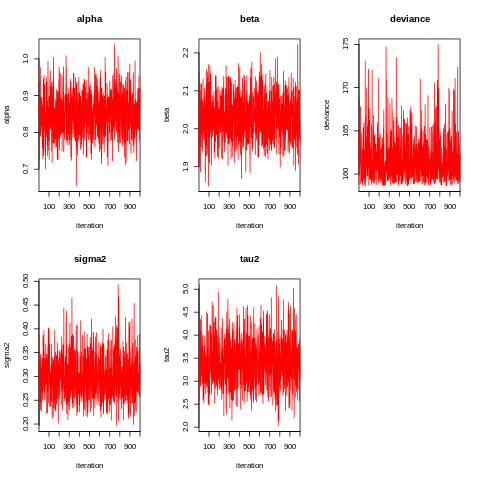

In [ ]:
%%R

#directly traceplot
traceplot(fit.JAGS,mfrow=c(2,3),ask=FALSE)


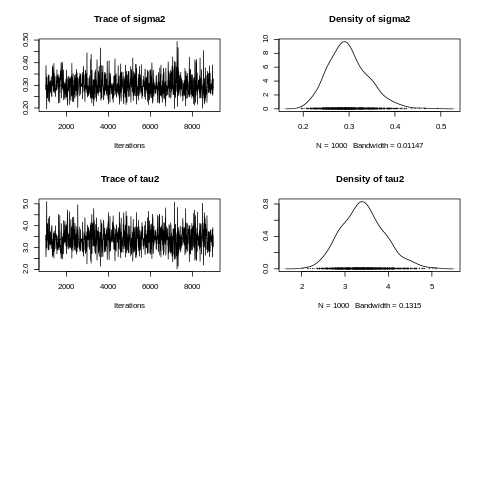

In [ ]:
%%R

#as an mcmc object
fit.JAGS.mcmc = as.mcmc(fit.JAGS)
plot(fit.JAGS.mcmc)

In [ ]:
%%R
summary(fit.JAGS.mcmc)


Iterations = 1008:9000
Thinning interval = 8 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean      SD Naive SE Time-series SE
alpha      0.8508 0.05486 0.001735       0.001653
beta       2.0323 0.05726 0.001811       0.001811
deviance 161.6988 2.54576 0.080504       0.080504
sigma2     0.2987 0.04429 0.001401       0.001401
tau2       3.4198 0.49721 0.015723       0.015723

2. Quantiles for each variable:

             2.5%      25%      50%      75%    97.5%
alpha      0.7395   0.8133   0.8518   0.8852   0.9605
beta       1.9250   1.9941   2.0324   2.0720   2.1397
deviance 158.7958 159.8308 161.0710 162.8596 168.0352
sigma2     0.2236   0.2679   0.2941   0.3257   0.3965
tau2       2.5222   3.0707   3.3998   3.7326   4.4721



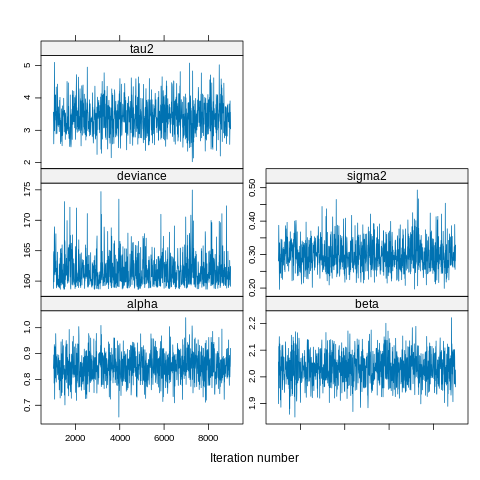

In [ ]:
%%R
library(lattice)
#traceplot as an mcmc object
xyplot(fit.JAGS.mcmc,layout=c(2,3))



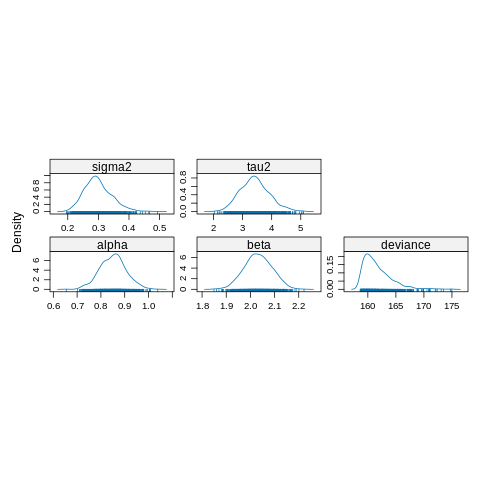

In [ ]:
%%R
#densityplot as an mcmc object
densityplot(fit.JAGS.mcmc,layout=c(3,2))

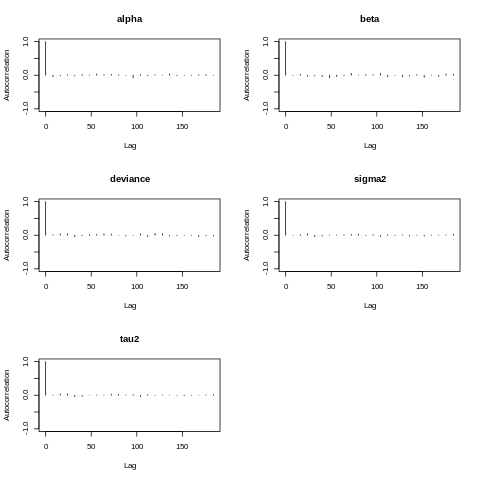

In [ ]:
%%R
#Autocorrelation plot
autocorr.plot(fit.JAGS.mcmc)

In [ ]:
%%R

#multiple initial values
inits.JAGS = list(list(alpha=0.0,beta=0.0,tau2=1.0),
                  list(alpha=10.0,beta=10.0,tau2=10.0),
                  list(alpha=-10.0,beta=-10.0,tau2=100.0))

#random initial values
inits.JAGS = function(){
  return(list(alpha=rnorm(1),beta=rnorm(1),tau2=rgamma(0.1,0.1)))
}


fit.JAGS = jags(data=dat.JAGS,
                inits=inits.JAGS,
                parameters.to.save = para.JAGS,
                n.chains=3,
                n.iter=9000,
                n.burnin=1000,
                model.file=linear.model.JAGS)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 3
   Total graph size: 511

Initializing model

  |**************************************************| 100%
  |**************************************************| 100%


Running multiple chains in JAGS (or any MCMC sampler) is a crucial step for assessing convergence and ensuring the reliability of your posterior inferences. By starting multiple chains from different initial values, you can check if they converge to the same posterior distribution. If the chains mix well and converge to a similar distribution, it provides evidence that you have explored the parameter space adequately and the results are not dependent on the starting points. This is often assessed using convergence diagnostics like the Gelman-Rubin statistic (Rhat).

In [ ]:
%%R

#multiple initial values
inits.JAGS = list(list(alpha=0.0,beta=0.0,tau2=1.0),
                  list(alpha=10.0,beta=10.0,tau2=10.0),
                  list(alpha=-10.0,beta=-10.0,tau2=100.0))

#random initial values
inits.JAGS = function(){
  return(list(alpha=rnorm(1),beta=rnorm(1),tau2=rgamma(0.1,0.1)))
}


fit.JAGS = jags(data=dat.JAGS,
                inits=inits.JAGS,
                parameters.to.save = para.JAGS,
                n.chains=3,
                n.iter=9000,
                n.burnin=1000,
                model.file=linear.model.JAGS)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 3
   Total graph size: 511

Initializing model

  |**************************************************| 100%
  |**************************************************| 100%


This code block summarizes the results from running multiple chains in JAGS, including convergence diagnostics and posterior summaries for the parameters.

In [ ]:
%%R
#summarizing the results
fit.JAGS.mcmc = as.mcmc(fit.JAGS)
summary(fit.JAGS.mcmc)


Iterations = 1008:9000
Thinning interval = 8 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean      SD Naive SE Time-series SE
alpha      0.8508 0.05617 0.001026      0.0010100
beta       2.0348 0.05717 0.001044      0.0010438
deviance 161.6961 2.52157 0.046037      0.0460442
sigma2     0.2992 0.04327 0.000790      0.0007901
tau2       3.4117 0.48691 0.008890      0.0090407

2. Quantiles for each variable:

             2.5%      25%      50%      75%    97.5%
alpha      0.7448   0.8137   0.8493   0.8884   0.9615
beta       1.9228   1.9963   2.0330   2.0717   2.1520
deviance 158.8220 159.8601 161.0631 162.7695 168.3702
sigma2     0.2265   0.2686   0.2946   0.3262   0.3965
tau2       2.5222   3.0660   3.3944   3.7235   4.4145



This code block generates trace plots for the MCMC chains, which are useful for visually assessing convergence and mixing of the chains for each parameter.

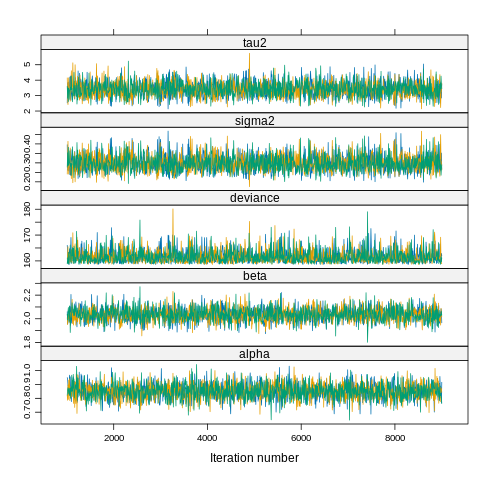

In [ ]:
%%R
#traceplot as an mcmc object
xyplot(fit.JAGS.mcmc)

This code block generates density plots for the posterior distributions of the parameters. Density plots provide a smoothed histogram of the MCMC samples, allowing you to visualize the shape and spread of the posterior distribution for each parameter.

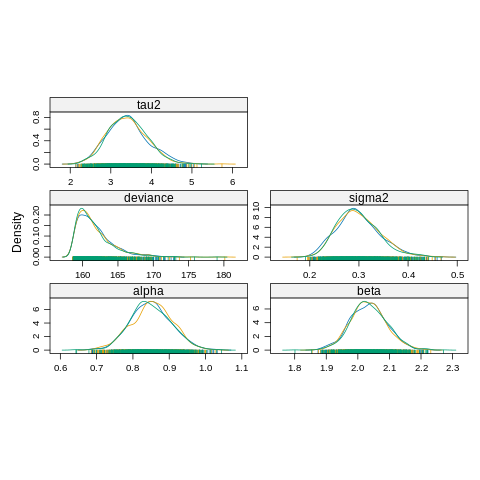

In [ ]:
%%R
#densityplot as an mcmc object
densityplot(fit.JAGS.mcmc)

The following code block displays an autocorrelation plot of the MCMC samples, which helps assess the mixing and convergence of the chains.

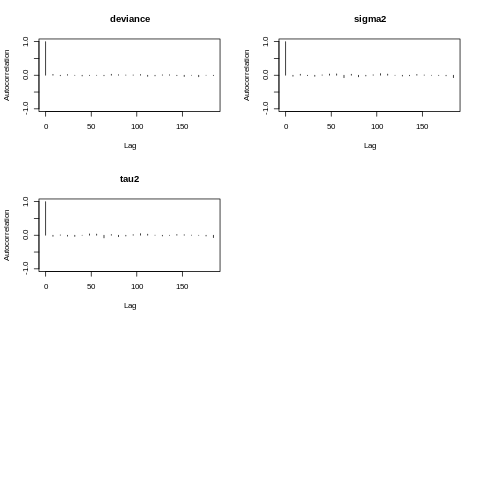

In [ ]:
%%R
#Autocorrelation plot
autocorr.plot(fit.JAGS.mcmc)

This code block computes and displays the Gelman-Rubin diagnostic, a common method for assessing convergence of multiple MCMC chains. A value close to 1 suggests convergence.

In [ ]:
%%R
#gelman.diag
gelman.diag(fit.JAGS.mcmc)

Potential scale reduction factors:

         Point est. Upper C.I.
alpha             1       1.01
beta              1       1.00
deviance          1       1.00
sigma2            1       1.00
tau2              1       1.01

Multivariate psrf

1
